## Connecting to Database and Extracting the tables

In [1]:
!pip install psycopg2

In [2]:
import psycopg2
import pandas as pd


host = "branchhomeworkdb.ccc0r2wfuew7.us-east-1.rds.amazonaws.com"
port = "5432"
database = "branchdsprojectgps"
user = "datascientist"
password = "47eyYBLT0laW5j9U24Uuy8gLcrN"

try:
    connection = psycopg2.connect(
        host=host,
        port=port,
        database=database,
        user=user,
        password=password
    )

    table_names = ["loan_outcomes", "user_gps_fixes", "user_attributes"]

    dataframes = {}

    for table_name in table_names:
        query = f"SELECT * FROM {table_name};"

        dataframe = pd.read_sql_query(query, connection)

        dataframes[table_name] = dataframe

    loan_outcomes_df = dataframes["loan_outcomes"]
    user_gps_fixes_df = dataframes["user_gps_fixes"]
    user_attributes_df = dataframes["user_attributes"]

except psycopg2.Error as error:
    print(f"Error: {error}")

finally:
    if connection is not None:
        connection.close()
        print("Connection closed")


<ipython-input-2-657aecedee3d>:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataframe = pd.read_sql_query(query, connection)
<ipython-input-2-657aecedee3d>:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataframe = pd.read_sql_query(query, connection)


Connection closed


<ipython-input-2-657aecedee3d>:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataframe = pd.read_sql_query(query, connection)


### Loan Outcomes data

In [3]:
import numpy as np

In [4]:
loan_outcomes_df.head()

,user_id,application_at,loan_outcome
0,1,2017-08-14 09:08:50.000000,defaulted
1,2,2016-05-17 10:10:12.447976,repaid
2,3,2016-10-20 10:07:20.459081,defaulted
3,4,2017-01-13 13:03:34.000000,defaulted
4,5,2016-11-03 15:41:39.124610,repaid


### User GPS fixes data

In [5]:
user_gps_fixes_df.head()

,id,gps_fix_at,server_upload_at,longitude,latitude,accuracy,altitude,bearing,location_provider,user_id
0,1,2017-06-22 09:37:20,2017-06-22 09:43:42,36.840540,-1.294342,68.4,0.0,0.0,fused,1
1,2,2017-08-14 07:50:27,2017-08-14 09:05:27,36.895270,-1.341928,1409.0,0.0,0.0,fused,1
2,3,2017-06-13 10:34:29,2017-06-13 10:54:48,36.811903,-1.307220,68.4,0.0,0.0,fused,1
3,4,2017-06-18 12:16:20,2017-06-18 12:16:24,36.907049,-1.309984,1581.0,0.0,0.0,fused,1
4,5,2017-06-28 09:39:08,2017-06-28 09:58:12,36.839396,-1.280310,1396.0,0.0,0.0,fused,1


### User attributes data

In [6]:
user_attributes_df.head()

,user_id,age,cash_incoming_30days
0,1,42,8988.12
1,2,36,9968.12
2,3,27,59.04
3,4,38,2129.03
4,5,33,2102.53


### Information of the datasets

In [7]:
print(loan_outcomes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         400 non-null    int64         
 1   application_at  400 non-null    datetime64[ns]
 2   loan_outcome    400 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 9.5+ KB
None


In [8]:
print(user_gps_fixes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26710 entries, 0 to 26709
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 26710 non-null  int64         
 1   gps_fix_at         26710 non-null  datetime64[ns]
 2   server_upload_at   26710 non-null  datetime64[ns]
 3   longitude          26710 non-null  float64       
 4   latitude           26710 non-null  float64       
 5   accuracy           26710 non-null  float64       
 6   altitude           26710 non-null  float64       
 7   bearing            26710 non-null  float64       
 8   location_provider  26710 non-null  object        
 9   user_id            26710 non-null  int64         
dtypes: datetime64[ns](2), float64(5), int64(2), object(1)
memory usage: 2.0+ MB
None


In [9]:
print(user_attributes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               400 non-null    int64  
 1   age                   400 non-null    int64  
 2   cash_incoming_30days  400 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 9.5 KB
None


### Checking Missing values in the datasets

In [10]:
loan_outcomes_df.isnull().sum()

user_id           0
application_at    0
loan_outcome      0
dtype: int64

In [11]:
user_gps_fixes_df.isnull().sum()

id                   0
gps_fix_at           0
server_upload_at     0
longitude            0
latitude             0
accuracy             0
altitude             0
bearing              0
location_provider    0
user_id              0
dtype: int64

In [12]:
user_attributes_df.isnull().sum()

user_id                 0
age                     0
cash_incoming_30days    0
dtype: int64

## Exploratory Data Analysis

In [13]:
import matplotlib.pyplot as plt

# Group the data by month and loan outcome
monthly_loan_outcomes = loan_outcomes_df.groupby([loan_outcomes_df['application_at'].dt.year, loan_outcomes_df['application_at'].dt.month, 'loan_outcome']).size().unstack(fill_value=0)


In [14]:
monthly_loan_outcomes

loan_outcome                   defaulted  repaid
application_at application_at                   
2015           6                       0       1
               7                       0       1
               9                       0       1
               11                      0       3
               12                      0       2
2016           3                       0       4
               4                       0       3
               5                       0       6
               6                       4       4
               7                       2      10
               8                       5       7
               9                       6       3
               10                      5       3
               11                      5       9
               12                     10      10
2017           1                       7       6
               2                      11       6
               3                       9       4
               4                       9       4
               5                       7       5
               6                       4       6
               7                       5       5
               8                      10      11
               9                       5       8
               10                      4       4
               11                      5      10
               12                      4      10
2018           1                       8       2
               2                       8       5
               3                      13       5
               4                       3       3
               5                      12       6
               6                      12       2
               7                      11       7
               8                       9       7
               9                       7       3
               10                      0       8
               11                      0       2
               12                      0       4

In [15]:
# Calculate the total number of loans per month
total_loans_per_month = monthly_loan_outcomes.sum(axis=1)

In [16]:
total_loans_per_month

application_at  application_at
2015            6                  1
                7                  1
                9                  1
                11                 3
                12                 2
2016            3                  4
                4                  3
                5                  6
                6                  8
                7                 12
                8                 12
                9                  9
                10                 8
                11                14
                12                20
2017            1                 13
                2                 17
                3                 13
                4                 13
                5                 12
                6                 10
                7                 10
                8                 21
                9                 13
                10                 8
                11                15
       

In [17]:
# Calculate the percentage of loans repaid (yes) and defaulted (no) per month
percentage_repaid = (monthly_loan_outcomes['repaid'] / total_loans_per_month) * 100
percentage_defaulted = (monthly_loan_outcomes['defaulted'] / total_loans_per_month) * 100

In [18]:
percentage_repaid

application_at  application_at
2015            6                 100.000000
                7                 100.000000
                9                 100.000000
                11                100.000000
                12                100.000000
2016            3                 100.000000
                4                 100.000000
                5                 100.000000
                6                  50.000000
                7                  83.333333
                8                  58.333333
                9                  33.333333
                10                 37.500000
                11                 64.285714
                12                 50.000000
2017            1                  46.153846
                2                  35.294118
                3                  30.769231
                4                  30.769231
                5                  41.666667
                6                  60.000000
                7       

In [19]:
percentage_defaulted

application_at  application_at
2015            6                  0.000000
                7                  0.000000
                9                  0.000000
                11                 0.000000
                12                 0.000000
2016            3                  0.000000
                4                  0.000000
                5                  0.000000
                6                 50.000000
                7                 16.666667
                8                 41.666667
                9                 66.666667
                10                62.500000
                11                35.714286
                12                50.000000
2017            1                 53.846154
                2                 64.705882
                3                 69.230769
                4                 69.230769
                5                 58.333333
                6                 40.000000
                7                 50.000000
 

In [20]:
# Combine year and month into a single string for the x-axis labels
monthly_labels = [f"{year}-{month:02d}" for year, month in percentage_repaid.index]
monthly_labels

['2015-06',
 '2015-07',
 '2015-09',
 '2015-11',
 '2015-12',
 '2016-03',
 '2016-04',
 '2016-05',
 '2016-06',
 '2016-07',
 '2016-08',
 '2016-09',
 '2016-10',
 '2016-11',
 '2016-12',
 '2017-01',
 '2017-02',
 '2017-03',
 '2017-04',
 '2017-05',
 '2017-06',
 '2017-07',
 '2017-08',
 '2017-09',
 '2017-10',
 '2017-11',
 '2017-12',
 '2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12']

### Loan Outcomes over Time

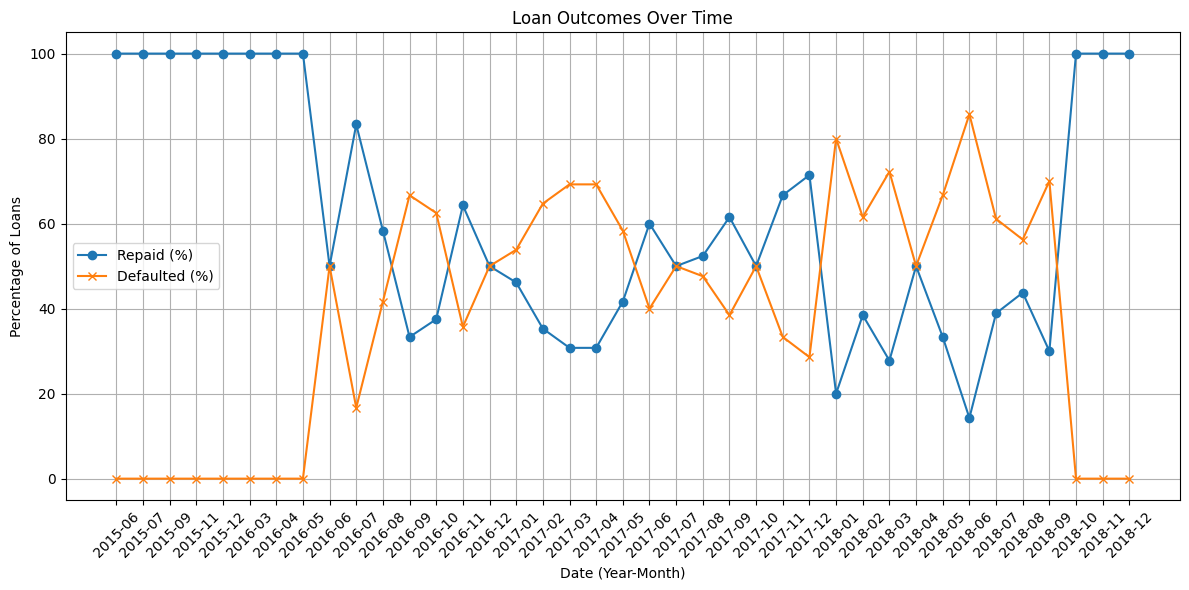

In [21]:
# Create a line chart to visualize loan outcomes by time
plt.figure(figsize=(12, 6))
plt.plot(monthly_labels, percentage_repaid.values, label='Repaid (%)', marker='o')
plt.plot(monthly_labels, percentage_defaulted.values, label='Defaulted (%)', marker='x')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Percentage of Loans')
plt.title('Loan Outcomes Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [22]:
# Merge the loan_outcomes and user_attributes DataFrames on 'user_id'
merged_df = pd.merge(loan_outcomes_df, user_attributes_df, on='user_id', how='inner')

In [23]:
merged_df.head()

,user_id,application_at,loan_outcome,age,cash_incoming_30days
0,1,2017-08-14 09:08:50.000000,defaulted,42,8988.12
1,2,2016-05-17 10:10:12.447976,repaid,36,9968.12
2,3,2016-10-20 10:07:20.459081,defaulted,27,59.04
3,4,2017-01-13 13:03:34.000000,defaulted,38,2129.03
4,5,2016-11-03 15:41:39.124610,repaid,33,2102.53


In [24]:
# Group the data by user age and loan outcome
grouped = merged_df.groupby(['age', 'loan_outcome']).size().unstack(fill_value=0)

In [25]:
grouped

loan_outcome,defaulted,repaid
age,,
18,7,3
19,5,1
20,6,2
21,8,4
22,6,9
23,12,4
24,8,1
25,5,4
26,6,2


In [26]:
# Calculate the total number of loans for each age group
total_loans_per_age = grouped.sum(axis=1)

In [27]:
total_loans_per_age

age
18     10
19      6
20      8
21     12
22     15
23     16
24      9
25      9
26      8
27     15
28     20
29     18
30     10
31     13
32     16
33     13
34     10
35      7
36     18
37      5
38     13
39     11
40     10
41     11
42      7
43      5
44     10
45      8
46      5
47      2
48     11
49      2
50      6
51      6
52      2
53      7
54      7
55      4
56      3
57      3
58      4
59      2
60      1
61      1
62      3
63      3
64      1
65      1
66      3
68      3
71      1
72      1
73      1
74      1
85      2
105     1
dtype: int64

In [28]:
# Calculate the percentage of loans repaid (yes) and defaulted (no) for each age group
percentage_repaid = (grouped['repaid'] / total_loans_per_age) * 100
percentage_defaulted = (grouped['defaulted'] / total_loans_per_age) * 100

### Loan Outcomes by User Age

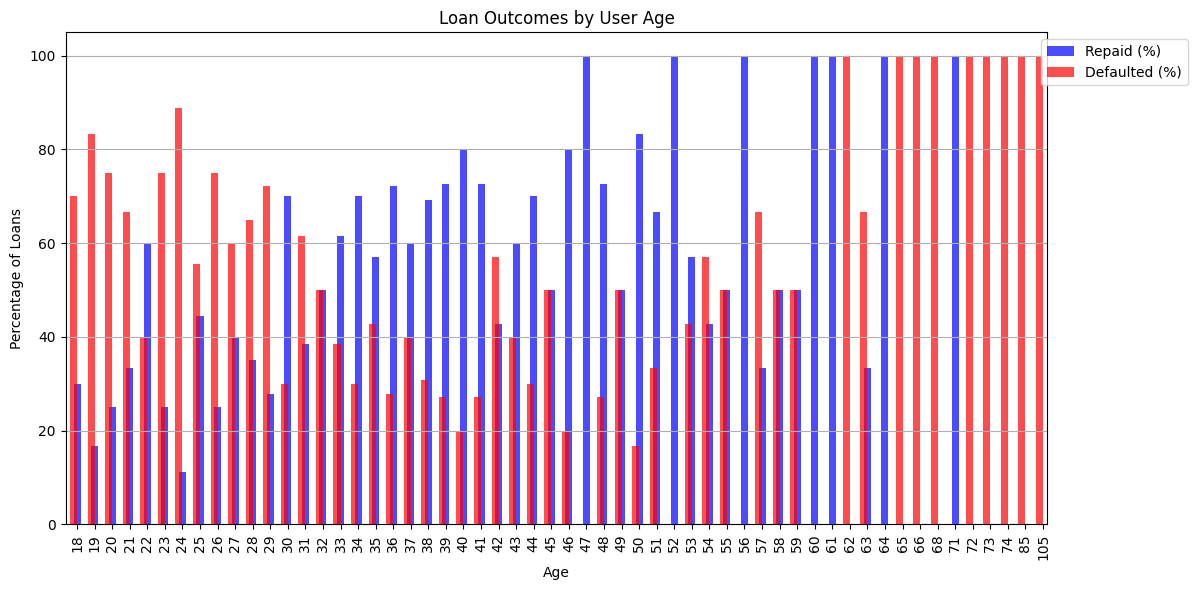

In [29]:
# Create a bar chart to visualize loan outcomes by user age
plt.figure(figsize=(12, 6))
percentage_repaid.plot(kind='bar', label='Repaid (%)', color='b', alpha=0.7, width=0.4)
percentage_defaulted.plot(kind='bar', label='Defaulted (%)', color='r', alpha=0.7, width=0.4, position=1)
plt.xlabel('Age')
plt.ylabel('Percentage of Loans')
plt.title('Loan Outcomes by User Age')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show()

Let's Understand more clearly by Visualising **Percentage of loans** for **Age Groups**

In [30]:
# Define age bins
bins = [18, 25, 35, 45, 55, 65, 100]  # Define your age groups as needed
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

In [31]:
# Create a new column 'age_group' based on age bins
merged_df['age_group'] = pd.cut(merged_df['age'], bins=bins, labels=labels)

In [32]:
# Group the data by age group and loan outcome
grouped = merged_df.groupby(['age_group', 'loan_outcome']).size().unstack(fill_value=0)

In [33]:
grouped

loan_outcome,defaulted,repaid
age_group,,
18-24,50,25
25-34,71,59
35-44,32,66
45-54,17,35
55-64,11,11
65+,11,1


In [34]:
# Calculate the total number of loans for each age group
total_loans_per_age_group = grouped.sum(axis=1)

In [35]:
# Calculate the percentage of loans repaid and defaulted for each age group
percentage_repaid = (grouped['repaid'] / total_loans_per_age_group) * 100
percentage_defaulted = (grouped['defaulted'] / total_loans_per_age_group) * 100

### Loan Outcomes by Age group

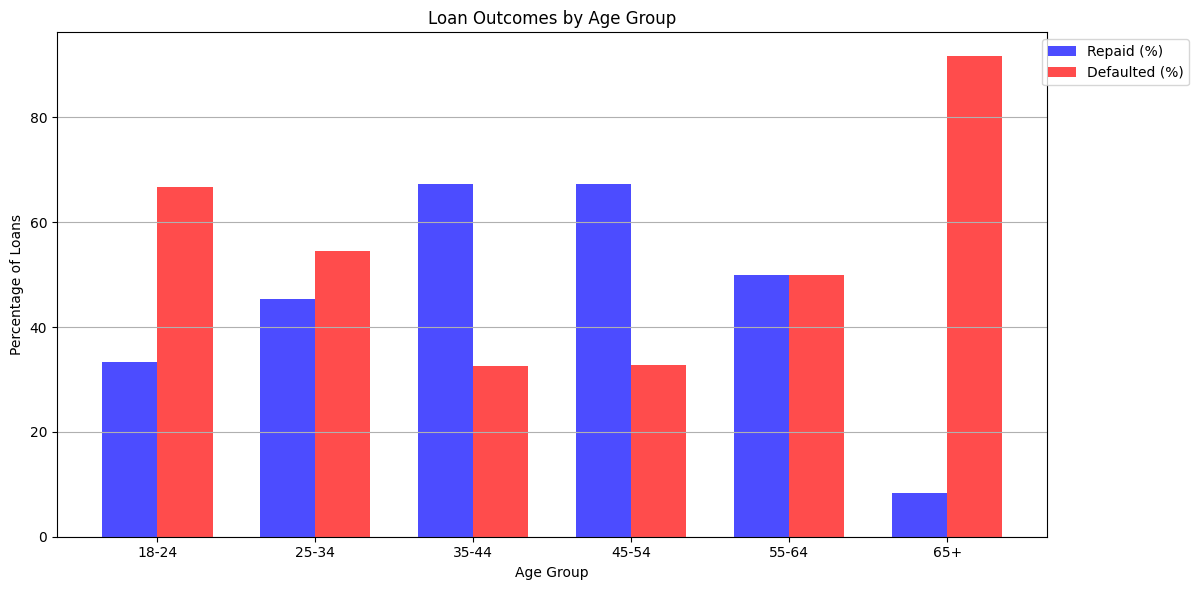

In [36]:
# Create a bar chart with bins for age groups
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(labels))
plt.bar(x, percentage_repaid, width=bar_width, label='Repaid (%)', color='b', alpha=0.7)
plt.bar([i + bar_width for i in x], percentage_defaulted, width=bar_width, label='Defaulted (%)', color='r', alpha=0.7)
plt.xlabel('Age Group')
plt.ylabel('Percentage of Loans')
plt.title('Loan Outcomes by Age Group')
plt.xticks([i + bar_width / 2 for i in x], labels)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show()

In [37]:
import geopandas as gpd

In [38]:
# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(
    user_gps_fixes_df,
    geometry=gpd.points_from_xy(user_gps_fixes_df.longitude, user_gps_fixes_df.latitude),
)

In [39]:
# Create a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<ipython-input-39-ab799660c472>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


### Locations of GPS Fixes

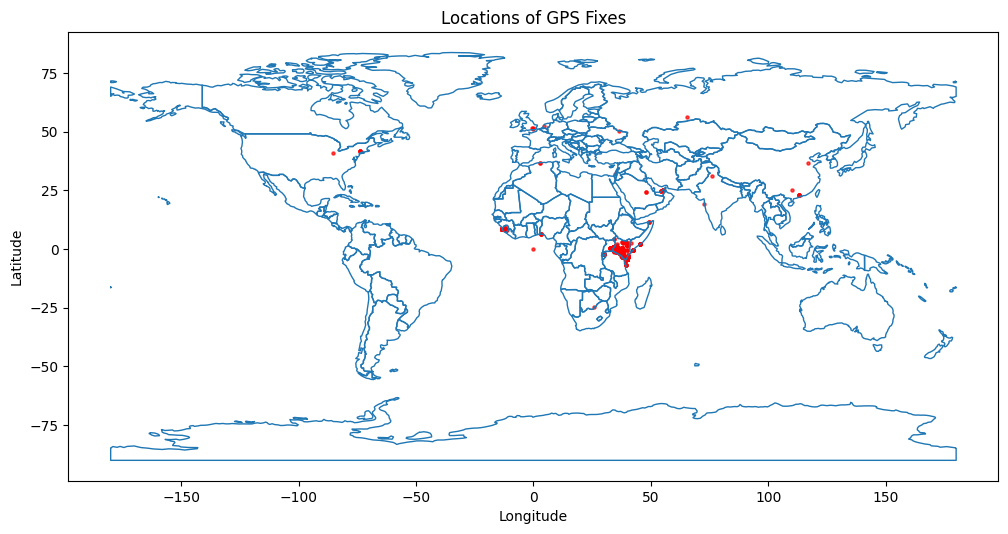

In [40]:
# Plot the GPS fixes on the map
fig, ax = plt.subplots(figsize=(12, 8))
world.boundary.plot(ax=ax, linewidth=1)
gdf.plot(ax=ax, markersize=5, color='red', alpha=0.7)
plt.title('Locations of GPS Fixes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [41]:
# Count the occurrences of each location provider
location_provider_counts = user_gps_fixes_df['location_provider'].value_counts()

### Count of Location providers

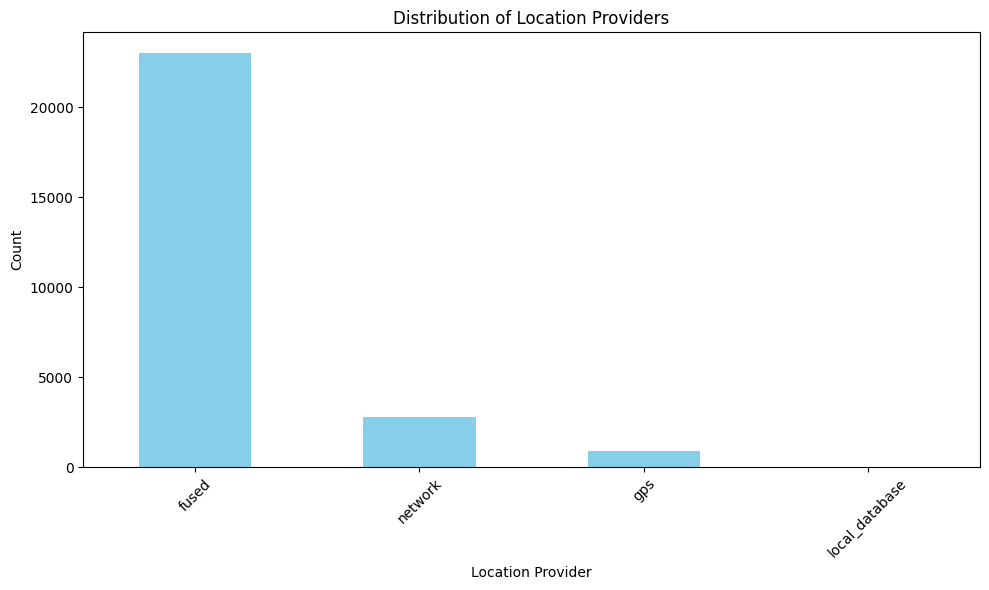

In [42]:
# Create a bar chart to visualize the distribution of location providers
plt.figure(figsize=(10, 6))
location_provider_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Location Provider')
plt.ylabel('Count')
plt.title('Distribution of Location Providers')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### Age Distribution of Borrowers

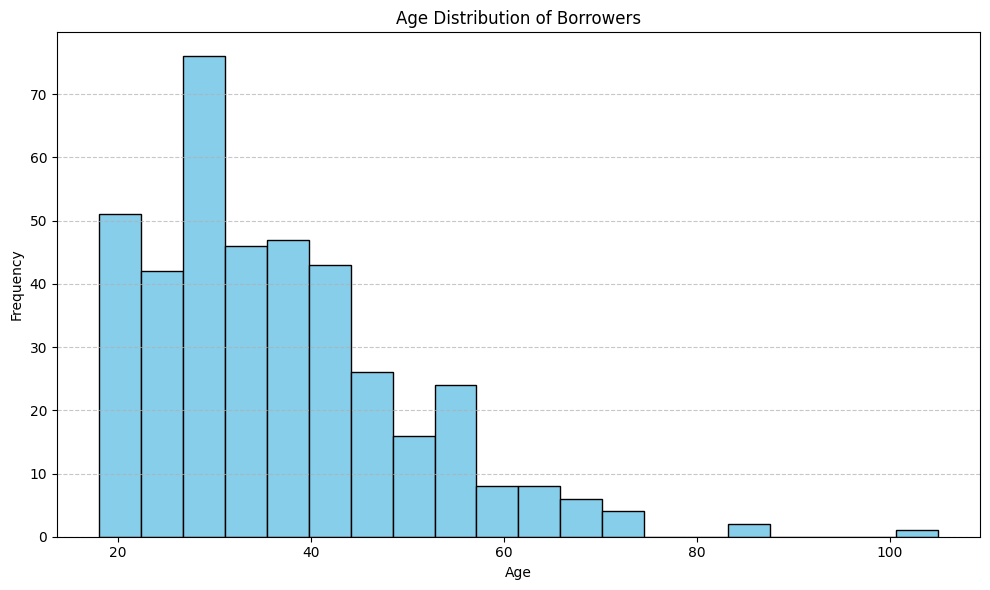

In [43]:
# Create a histogram to visualize the age distribution
plt.figure(figsize=(10, 6))
plt.hist(user_attributes_df['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Borrowers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

Now Let's segment users based on **Age** and **Cash incoming** of the users

In [44]:
features = ['age', 'cash_incoming_30days']

In [45]:
# Extract the selected features from the DataFrame
user_data = user_attributes_df[features]

In [46]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [47]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(user_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

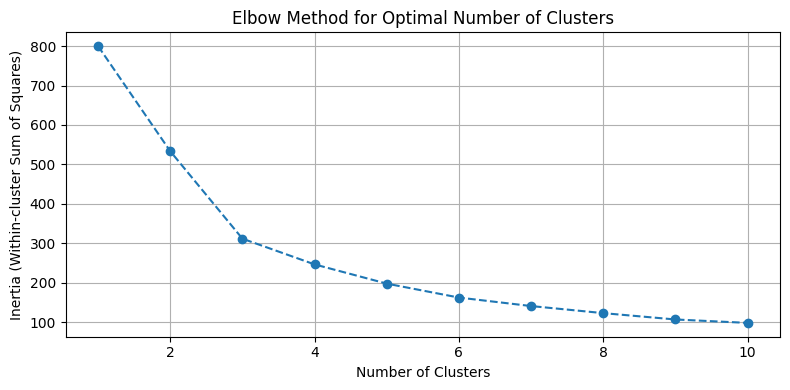

In [48]:
# Finding optimal clusters for KMeans
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.tight_layout()
plt.show()

### User Segmentation using KMeans (Un-supervised Learning)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


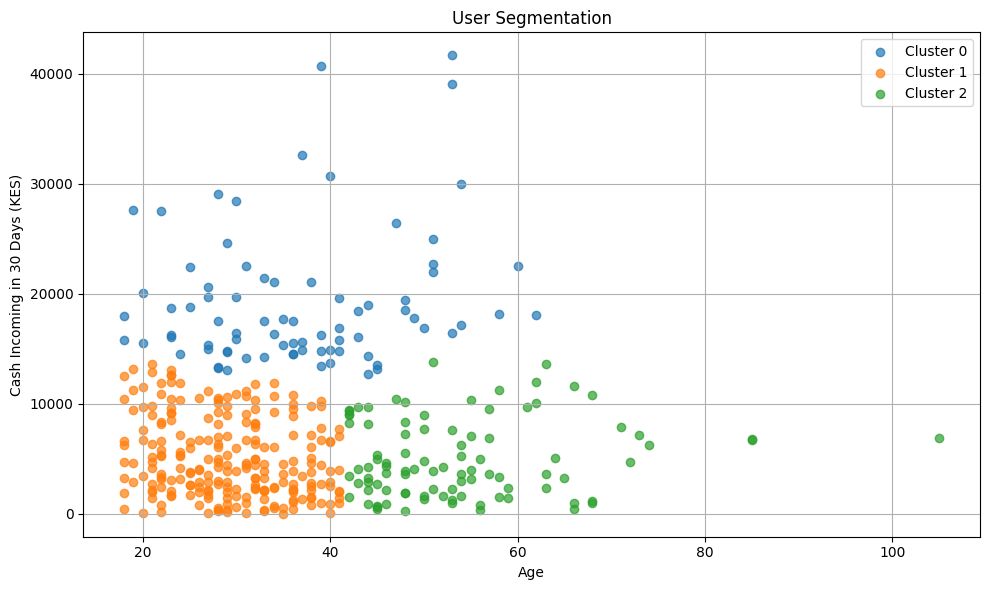

In [49]:
n_clusters = 3

# Perform k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
user_attributes_df['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster_label in range(n_clusters):
    cluster_data = user_attributes_df[user_attributes_df['cluster'] == cluster_label]
    plt.scatter(cluster_data['age'], cluster_data['cash_incoming_30days'], label=f'Cluster {cluster_label}', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Cash Incoming in 30 Days (KES)')
plt.title('User Segmentation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Model Building

In [50]:
# Data merged from loan_outcomes and user_attributes
merged_df.head()

,user_id,application_at,loan_outcome,age,cash_incoming_30days,age_group
0,1,2017-08-14 09:08:50.000000,defaulted,42,8988.12,35-44
1,2,2016-05-17 10:10:12.447976,repaid,36,9968.12,35-44
2,3,2016-10-20 10:07:20.459081,defaulted,27,59.04,25-34
3,4,2017-01-13 13:03:34.000000,defaulted,38,2129.03,35-44
4,5,2016-11-03 15:41:39.124610,repaid,33,2102.53,25-34


Deleting **age_group** column

In [51]:
merged_df.drop('age_group',axis=1,inplace=True)

Deleting **user_id** and **application_at** columns

In [52]:
merged_df.drop(['user_id','application_at'],axis=1,inplace=True)

In [53]:
merged_df.head()

,loan_outcome,age,cash_incoming_30days
0,defaulted,42,8988.12
1,repaid,36,9968.12
2,defaulted,27,59.04
3,defaulted,38,2129.03
4,repaid,33,2102.53


In [54]:
merged_df['cash_incoming_30days'].max()

41657.81

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
merged_df['loan_outcome'] = le.fit_transform(merged_df['loan_outcome'])

In [ ]:
merged_df.head()

,loan_outcome,age,cash_incoming_30days
0,0,42,8988.12
1,1,36,9968.12
2,0,27,59.04
3,0,38,2129.03
4,1,33,2102.53


In [ ]:
merged_df.to_csv('merged_df.csv',index=False)

In [ ]:
X = merged_df.drop('loan_outcome',axis=1)
y = merged_df['loan_outcome']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='newton-cg')
log_reg.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [ ]:
log_reg.score(X_train,y_train)

0.56875

In [ ]:
log_reg.score(X_test,y_test)

0.625

In [ ]:
from sklearn.metrics import classification_report,roc_auc_score

Model Performance

In [ ]:
print(classification_report(y_test,log_reg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62        40
           1       0.62      0.62      0.62        40

    accuracy                           0.62        80
   macro avg       0.62      0.62      0.62        80
weighted avg       0.62      0.62      0.62        80



Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt.score(X_train,y_train)

1.0

In [ ]:
dt.score(X_test,y_test)

0.65

Model Performance

In [ ]:
print(classification_report(y_test,dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.66      0.62      0.64        40
           1       0.64      0.68      0.66        40

    accuracy                           0.65        80
   macro avg       0.65      0.65      0.65        80
weighted avg       0.65      0.65      0.65        80



Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rf.score(X_train,y_train)

1.0

In [ ]:
rf.score(X_test,y_test)

0.6625

Model performance

In [ ]:
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67        40
           1       0.67      0.65      0.66        40

    accuracy                           0.66        80
   macro avg       0.66      0.66      0.66        80
weighted avg       0.66      0.66      0.66        80



XGBoost Classifier

In [ ]:
import xgboost as xgb

In [ ]:
xgb_classifier = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    seed=42
)

In [ ]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
xgb_classifier.score(X_test,y_test)

0.6625

Model performance

In [ ]:
print(classification_report(y_test,xgb_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65        40
           1       0.65      0.70      0.67        40

    accuracy                           0.66        80
   macro avg       0.66      0.66      0.66        80
weighted avg       0.66      0.66      0.66        80



Now Let's perform Cross validation using **StratifiedKFold**

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

classifiers = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("XGBoost", xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    seed=42
))
]


for clf_name, clf in classifiers:
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    roc_auc_scores = cross_val_score(clf, X, y, cv=skf, scoring="roc_auc")

    print(f"{clf_name} Mean ROC AUC Score:", np.mean(roc_auc_scores))

Logistic Regression Mean ROC AUC Score: 0.556375
Decision Tree Mean ROC AUC Score: 0.5775
Random Forest Mean ROC AUC Score: 0.623125
XGBoost Mean ROC AUC Score: 0.6649375


XGBoost Performs Better than Other ML Models.

Let's train XGBoost model on whole dataset and save this model for prediction using Streamlit App

In [ ]:
xgb_classifier.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
import pickle
pickle.dump(xgb_classifier,open('xgb_model.pkl','wb'))